In [ ]:
import numpy as np
import pandas as pd

In [6]:
data = pd.read_csv('Downloads/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data.shape

(10000, 14)

In [8]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

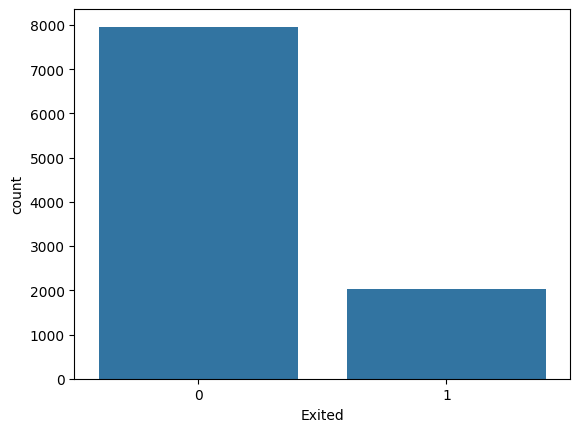

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the distribution of the target variable
sns.countplot(x='Exited', data=data)
plt.show()


In [12]:
from sklearn.preprocessing import LabelEncoder

# Drop irrelevant columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

print(data.head())


   CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          0       0   42       2       0.00              1   
1          608          2       0   41       1   83807.86              1   
2          502          0       0   42       8  159660.80              3   
3          699          0       0   39       1       0.00              2   
4          850          2       0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  


In [13]:
# Create new features if necessary (e.g., interaction terms, polynomial features, etc.)
# For this example, we'll keep it simple and use the existing features.

# Splitting features and target variable
X = data.drop('Exited', axis=1)
y = data['Exited']


In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)


C:\Users\hepsi\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


[[1562   45]
 [ 322   71]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.61      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.72      0.58      0.59      2000
weighted avg       0.79      0.82      0.77      2000

Accuracy: 0.8165


In [19]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")


[[1546   61]
 [ 210  183]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Accuracy: 0.8645


In [22]:
# Assuming RandomForestClassifier performed better
final_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the final model on the entire dataset
final_model.fit(X, y)


RandomForestClassifier(random_state=42)

# Making Predictions

In [21]:
# Example of new data (ensure it has the same format as the training data)
new_data = pd.DataFrame({
    'CreditScore': [600],
    'Geography': [0],  # Assuming 0 is for a specific country
    'Gender': [1],     # Assuming 1 is for Male
    'Age': [40],
    'Tenure': [3],
    'Balance': [60000],
    'NumOfProducts': [2],
    'HasCrCard': [1],
    'IsActiveMember': [1],
    'EstimatedSalary': [50000]
})

# Predict churn
new_pred = final_model.predict(new_data)
print(f"Prediction: {'Churn' if new_pred[0] == 1 else 'No Churn'}")


Prediction: No Churn
